In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(array([3.143e+03, 1.746e+03, 4.130e+02, 4.510e+02, 1.408e+03, 6.000e+00,
        0.000e+00, 4.180e+02, 7.530e+02, 6.580e+02, 2.730e+02, 9.400e+01,
        6.100e+01, 4.200e+01, 4.500e+01, 4.900e+01, 1.200e+01, 2.110e+02,
        1.040e+02, 5.800e+01, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.300e+01, 1.100e+01, 1.500e+01, 5.000e+00, 7.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  41.88198641,  241.82538588,  441.76878536,  641.71218484,
         841.65558432, 1041.59898379, 1241.54238327, 1441.48578275,
        1641.42918223, 1841.37258171, 2041.31598118, 2241.25938066,
        2441.20278014, 2641.14617962, 2841.08957909, 3041.03297857,
        3240.97637805, 3440.91977753, 3640.86317701, 3840.80657648,
        4040.74997596, 4240.69337544, 4440.63677492, 4640.58017439,
        4840.52357387, 5040.46697335, 5240.41037283, 5440.3537723 ,
        5640.29717178, 584

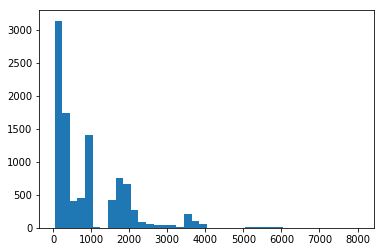

In [9]:
STATIC_DENSITY = 1.2250 # sea level temp
STANDARD_TEMP = 300
STANDARD_LR = 0
GRAV_ACCEL = 9.8
MOL_MASS = 0.0289644
GASS_CONST = 8.3144598
Z0 = 0

def z2rho(z):
    '''
    Calculate air density at a given altitude assuming that the 
    barometric formula holds.
    '''
    if z < 1:
        return 100000
    return STATIC_DENSITY * np.exp(-GRAV_ACCEL * MOL_MASS * (z - Z0) / GASS_CONST / STANDARD_TEMP)

def paccel(z):
    '''
    Calculate acceleration of a pollen particle given the pollen
    density at that location, assuming the barometric formula holds
    '''
    return GRAV_ACCEL * (z2rho(z) / 1435 - 1)

ps = np.tile(np.array([2., 0.]), (10000, 1))

for i in range(5000):
    for k in range(len(ps)):
        ps[k][1] += paccel(ps[k][0]) + np.random.normal(0, 10) * 0.01
        ps[k][0] += ps[k][1] * 0.01

plt.hist(ps[:,0], bins=40)

[-7.71326521 65.44122755]


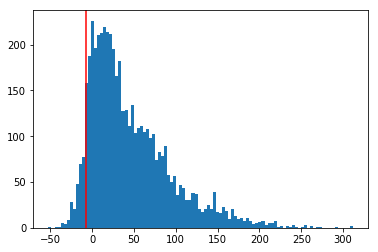

In [7]:
minval = 99999
minidx = 0

for k in range(len(ps)):
    z = ps[k][0]
    rep = np.abs(paccel(z) - (MOL_MASS * 10))
    if rep < minval:
        minval = rep
        minidx = k
        
print(ps[k])

plt.hist(ps[:,0], bins=100)
plt.axvline(x=ps[k][0], color='r')

(array([1.278e+03, 9.600e+02, 3.200e+02, 1.120e+02, 1.800e+01, 5.240e+02,
        3.880e+02, 0.000e+00, 0.000e+00, 1.500e+01, 2.040e+02, 2.890e+02,
        3.720e+02, 1.350e+02, 3.800e+01, 4.500e+01, 7.000e+00, 3.200e+01,
        1.800e+01, 3.000e+01, 7.000e+00, 1.100e+01, 9.000e+00, 7.100e+01,
        2.500e+01, 5.900e+01, 1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 6.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 6.000e+00]),
 array([  50.29231029,  197.52971921,  344.76712812,  492.00453703,
         639.24194595,  786.47935486,  933.71676378, 1080.95417269,
        1228.1915816 , 1375.42899052, 1522.66639943, 1669.90380835,
        1817.14121726, 1964.37862617, 2111.61603509, 2258.853444  ,
        2406.09085292, 2553.32826183, 2700.56567074, 2847.80307966,
        2995.04048857, 3142.27789749, 3289.5153064 , 3436.75271531,
        3583.99012423, 3731.22753314, 3878.46494206, 4025.70235097,
        4172.93975988, 432

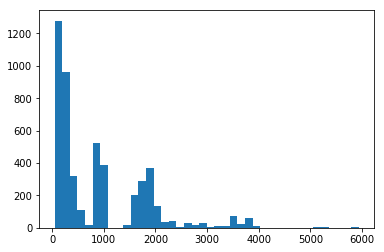

In [10]:
STATIC_DENSITY = 1.2250 # sea level temp
STANDARD_TEMP = 300
STANDARD_LR = 0
GRAV_ACCEL = 9.8
MOL_MASS = 0.0289644
GASS_CONST = 8.3144598
Z0 = 0

def z2rho(z):
    '''
    Calculate air density at a given altitude assuming that the 
    barometric formula holds.
    '''
    if z < 1:
        return 100000
    return STATIC_DENSITY * np.exp(-GRAV_ACCEL * MOL_MASS * (z - Z0) / GASS_CONST / STANDARD_TEMP)

def paccel(z):
    '''
    Calculate acceleration of a pollen particle given the pollen
    density at that location, assuming the barometric formula holds
    '''
    return GRAV_ACCEL * (z2rho(z) / 1435 - 1)

ps = np.tile(np.array([2., 0.]), (5000, 1))

for i in range(5000):
    for k in range(len(ps)):
        ps[k][1] += paccel(ps[k][0]) + np.random.normal(0, 10) * 0.01
        ps[k][0] += ps[k][1] * 0.01

plt.hist(ps[:,0], bins=40)

In [ ]:
minval = 99999
minidx = 0

for k in range(len(ps)):
    z = ps[k][0]
    rep = np.abs(paccel(z) - (MOL_MASS * 10))
    if rep < minval:
        minval = rep
        minidx = k
        
print(ps[k])

plt.hist(ps[:,0], bins=100)
plt.axvline(x=ps[k][0], color='r')